GeoTIFF Metadata:
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 811, 'height': 669, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00026949458523585647, 0.0, -85.10908496333583,
       0.0, -0.00026949458523585647, 35.09008145980516)}


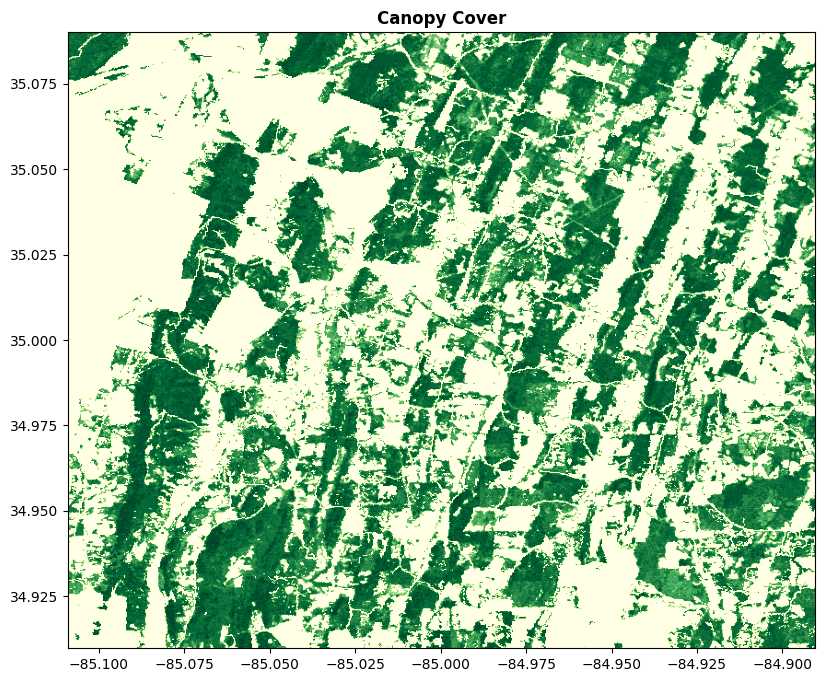

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

<Figure size 640x480 with 0 Axes>

In [15]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# Define the path to your downloaded GeoTIFF file
file_path = '/Users/Aiden.Johnson/Library/CloudStorage/OneDrive-NewwaveTelecomandTechnologies,Inc/projects/GEE_Treemap/download.CANOPYPCT.tif'

# Open the GeoTIFF file using rasterio
with rasterio.open(file_path) as src:
    # Read the data
    canopy_data = src.read(1)  # Read the first band (adjust if necessary)
    
    # Get metadata for visualization and analysis
    print("GeoTIFF Metadata:")
    print(src.meta)

    # Plot the GeoTIFF
    plt.figure(figsize=(10, 8))
    show(canopy_data, transform=src.transform, cmap='YlGn', title="Canopy Cover")
    plt.colorbar(plt.cm.ScalarMappable(cmap='YlGn'), label='Canopy Cover')
    plt.show()


In [6]:
#pip install earthengine-api --upgrade

In [7]:
#!pip3 install --upgrade pip

In [14]:
import ee
#import geemap
#import folium

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='nlcd-project',auth_mode=notebook)
print(ee.String('Hello from the Earth Engine servers!').getInfo())

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>

In [ ]:
import ee

# Initialize the Earth Engine API
ee.Initialize()

# Define the collection and point of interest
collection = ee.ImageCollection('USFS/GTAC/TreeMap/v2016')
point = ee.Geometry.Point(-85, 35.0)

# Define the region of interest (ROI) as a 10km x 10km buffer around the point
roi = point.buffer(10000).bounds()

# Select the canopy cover band (if available)
canopy_cover_band = 'STANDHT'  # Adjust this to the correct band name in the collection
image = collection.median().select(canopy_cover_band)

# Clip the image to the ROI
clipped_image = image.clip(roi)

# Generate a download URL
url = clipped_image.getDownloadURL({
    'scale': 30,  # Adjust scale (spatial resolution) as needed
    'region': roi.getInfo()['coordinates'],
    'fileFormat': 'GeoTIFF'
})

print("Download URL:")
print(url)
